# CNN Prediction

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import json
import time
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from core.technical_analysis import add_technical_indicators_with_intervals
from tqdm import tqdm

## Params

In [11]:
window_size = 10

## Data

Choose 15 technical indicators and 15 intervals for running them

In [3]:
technical_indicators = [
      "SMA",
      "KAMA",
      "MIDPRICE",
      "EMA",
      "WMA",
      "MOM",
      "ROCP",
      "TRIX",
      "ATR",
      "RSI",
      "ADX",
      "CCI",
      "WILLR",
      "CMO",
      "AROONOSC"
]
intervals = [
      2,
      3,
      4,
      5,
      7,
      9,
      11,
      13,
      17,
      21,
      34,
      41,
      55,
      77,
      99
]

In [4]:
technical_indicators_and_interval_cols = []
for indicator in technical_indicators:
    for interval in intervals:
        technical_indicators_and_interval_cols.append(indicator + '_' + str(interval))

In [38]:
# TRAIN
train_df = pd.read_csv('../data/BTCUSD-1M-2016_01_01-2016_6_31.csv', index_col=0)
train_df.head()

,Open,Close,High,Low,Volume
time,,,,,
2016-01-01 00:00:00,429.95,429.95,429.95,429.95,0.0
2016-01-01 00:01:00,429.95,429.95,429.95,429.95,0.0
2016-01-01 00:02:00,429.95,429.95,429.95,429.95,0.0
2016-01-01 00:03:00,429.95,429.95,429.95,429.95,0.0
2016-01-01 00:04:00,429.95,429.95,429.95,429.95,0.0


In [39]:
# TEST
test_df = pd.read_csv('../data/BTCUSD-1M-2020_01_01-2020_03_31.csv', index_col=0)
test_df.head()

,Open,Close,High,Low,Volume
time,,,,,
2020-01-01 00:00:00,7165.9,7163.3,7170.79,7163.3,0.007931
2020-01-01 00:01:00,7163.3,7163.3,7164.23,7163.3,0.002646
2020-01-01 00:02:00,7163.3,7163.0,7164.22,7163.0,0.063904
2020-01-01 00:03:00,7163.0,7163.6,7163.60,7163.0,0.002706
2020-01-01 00:04:00,7163.6,7163.0,7163.60,7163.0,1.751844


### Add technical indicators

In [40]:
# TRAIN
train_df = add_technical_indicators_with_intervals(
  train_df, 
  indicators=technical_indicators, 
  intervals=intervals
)
train_df.head()

,Open,Close,High,Low,Volume,SMA_2,SMA_3,SMA_4,SMA_5,SMA_7,...,AROONOSC_9,AROONOSC_11,AROONOSC_13,AROONOSC_17,AROONOSC_21,AROONOSC_34,AROONOSC_41,AROONOSC_55,AROONOSC_77,AROONOSC_99
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 04:55:00,436.53,436.53,436.53,436.53,0.0,0.0,5.684342e-14,5.684342e-14,5.684342e-14,-2.842171e-13,...,0.0,1.0,0.846154,0.647059,0.523810,0.323529,0.975610,0.727273,0.519481,0.404040
2016-01-01 04:56:00,436.53,436.53,436.53,436.53,0.0,0.0,5.684342e-14,5.684342e-14,5.684342e-14,-2.842171e-13,...,0.0,0.0,0.923077,0.705882,0.571429,0.352941,1.000000,0.745455,0.532468,0.414141
2016-01-01 04:57:00,436.53,436.53,436.53,436.53,0.0,0.0,5.684342e-14,5.684342e-14,5.684342e-14,-2.842171e-13,...,0.0,0.0,1.000000,0.764706,0.619048,0.382353,0.317073,0.763636,0.545455,0.424242
2016-01-01 04:58:00,436.53,436.53,436.53,436.53,0.0,0.0,5.684342e-14,5.684342e-14,5.684342e-14,-2.842171e-13,...,0.0,0.0,0.000000,0.823529,0.666667,0.411765,0.341463,0.781818,0.558442,0.434343
2016-01-01 04:59:00,436.53,436.53,436.53,436.53,0.0,0.0,5.684342e-14,5.684342e-14,5.684342e-14,-2.842171e-13,...,0.0,0.0,0.000000,0.882353,0.714286,0.441176,0.365854,0.800000,0.571429,0.444444


In [41]:
# TEST
test_df = add_technical_indicators_with_intervals(
  test_df, 
  indicators=technical_indicators, 
  intervals=intervals
)
test_df.head()

,Open,Close,High,Low,Volume,SMA_2,SMA_3,SMA_4,SMA_5,SMA_7,...,AROONOSC_9,AROONOSC_11,AROONOSC_13,AROONOSC_17,AROONOSC_21,AROONOSC_34,AROONOSC_41,AROONOSC_55,AROONOSC_77,AROONOSC_99
time,,,,,,,,,,,,,,,,,,,,,
2020-01-01 04:55:00,7195.97,7189.79,7195.97,7189.79,5.160500,-3.090000e+00,-1.460000,-0.645,-1.626,-4.007143,...,-0.555556,-0.909091,-0.769231,-0.588235,-0.904762,-0.558824,-0.463415,-0.345455,-0.948052,-0.838384
2020-01-01 04:56:00,7189.79,7189.59,7195.76,7189.59,0.002650,-1.000000e-01,-2.193333,-1.245,-0.676,-2.755714,...,-0.555556,-0.454545,-0.769231,-0.588235,-0.904762,-0.558824,-0.463415,-0.345455,-0.948052,-0.838384
2020-01-01 04:57:00,7189.59,7189.59,7189.59,7189.59,0.000000,1.818989e-12,-0.066667,-1.645,-0.996,-1.304286,...,-0.555556,-0.454545,-0.769231,-0.588235,-0.809524,-0.558824,-0.463415,-0.345455,-0.948052,-0.838384
2020-01-01 04:58:00,7189.59,7189.65,7195.76,7189.59,0.054642,3.000000e-02,0.040000,-0.005,-1.268,-0.431429,...,-0.555556,-0.454545,-0.384615,-0.588235,-0.809524,-0.558824,-0.463415,-0.345455,-0.948052,-0.838384
2020-01-01 04:59:00,7189.65,7188.73,7189.68,7188.73,1.097648,-4.600000e-01,-0.593333,-0.660,-0.740,-1.457143,...,-0.222222,-0.454545,-0.384615,-0.588235,-0.476190,-0.558824,-0.463415,-0.345455,-0.935065,-0.838384


### Generate buy and sell labels

In [42]:
len_train = len(train_df) - 1
len_test = len(test_df) - 1

In [43]:
def _generate_buy_sell_labels(close, window_size=10):
    '''
    Look through the window and see if it's a buy or sell movement
    '''
    labels = np.zeros((len(close), ))
    for i in range(len(close) - window_size):
        if close[i] < close[i+1:i+window_size].min(): 
            labels[i] = 1
        if close[i] > close[i+1:i+window_size].max(): 
            labels[i] = 2
    return labels

In [44]:
  def _handle_class_unbalacing(x, y):
    '''
    For up and down movements we have class unbalacing, this function makes the same 
    number of ups and downs
    '''
    min_size = 9999999999
    num_labels = int(np.max(y)) + 1

    for label in [i for i in range(num_labels)]:
        if min_size > np.sum(np.array(y == label)): min_size = np.sum(np.array(y == label))

    labels_count = np.zeros((num_labels, ))
    i = 0
    new_x, new_y = [], []

    tqdm_e = tqdm(range(len(y)))
    while np.sum(labels_count) < num_labels * min_size:
        if labels_count[int(y[i])] < min_size:
            new_x.append(x[i])
            new_y.append(y[i])
            labels_count[int(y[i])] += 1

        i += 1
        if i > 0 and i % 10000 == 0:
            tqdm_e.update(10000)
            tqdm_e.refresh()
    tqdm_e.close()

    return np.array(new_x), np.array(new_y)

In [49]:
 def get_data(cols, labels, df, num_techical_indicators=15, class_unbalacing=True):
    y = labels

    x = df.get(cols).values
    x = x.reshape((x.shape[0], num_techical_indicators, num_techical_indicators))
    x = np.stack((x,) * 3, axis=-1)


    if class_unbalacing: return _handle_class_unbalacing(x, y)
    return np.array(x), np.array(y)

In [50]:
train_labels = _generate_buy_sell_labels(train_df['Close'].values, window_size=window_size)
test_labels = _generate_buy_sell_labels(test_df['Close'].values, window_size=window_size)

In [52]:
x_train, y_train = get_data(
    technical_indicators_and_interval_cols, 
    train_labels, 
    train_df,
    class_unbalacing=True
)
x_test, y_test = get_data(
    technical_indicators_and_interval_cols, 
    test_labels, 
    test_df,
    class_unbalacing=True
)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

 97%|█████████▋| 120000/123550 [00:01<00:00, 88734.75it/s] 


((25371, 15, 15, 3), (25371,), (55812, 15, 15, 3), (55812,))

The technical indicators will generate an image which we'll run through a CNN

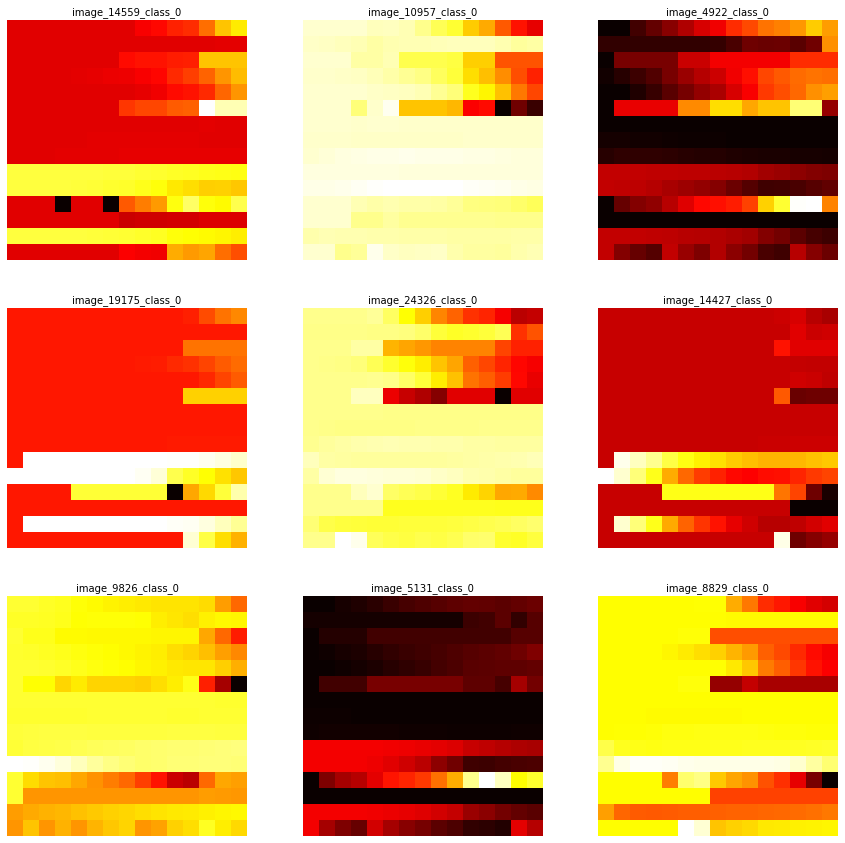

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15, 15))
columns = rows = 3
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index, :, :, 0]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img, cmap='hot', interpolation='nearest')
plt.show()

### Print labels

In [57]:
close = train_df["Close"].values
labels = train_labels
size = 500
closes = close[:size]

states_buy = []
states_sell = []

for i in range(size):
    if labels[i] == 1: states_buy.append(i)
    if labels[i] == 2: states_sell.append(i)

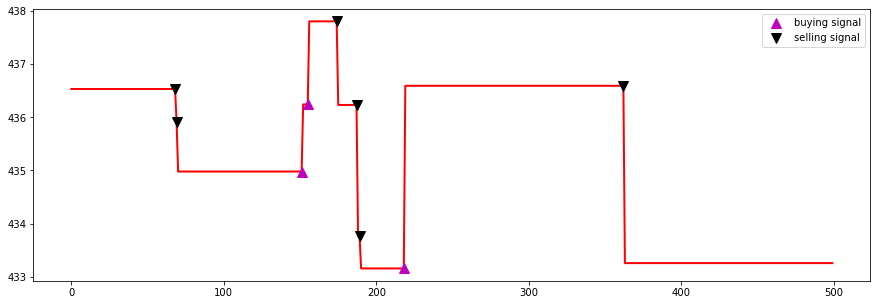

In [58]:
fig = plt.figure(figsize = (15,5))
plt.plot(closes, color='r', lw=2.)
plt.plot(closes, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(closes, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.legend()
plt.show()

## Model